# <img src="./resources/GA.png" width="25" height="25" />   <span style="color:Purple">Project 5 :  Food Insecurity Regression Study</span> 
---
## <span style="color:Green">02 - Preprocessing - EDA</span>      

#### Alec Edgecliffe-Johnson, Ryan McDonald, Andrew Roberts, Ira Seidman- General Assembly 



---

**Imports**

In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Reading the Data

In [2]:
df = pd.read_csv('data/df_final.csv')

### Data Dictionary:

**Data Dictionary created for datasets utilized in this analysis**

| Feature Name                                  | Description                                         | Feature Name                                                  | Description                      |
|-----------------------------------------------|-----------------------------------------------------|---------------------------------------------------------------|----------------------------------|
| fips                                          | Federal Information Processing Series Code          | percent_enrolled_in_free_or_reduced_lunch                     | Percent                          |
| state_name                                    | Name                                                | percent_homeowners                                            | Percent                          |
| county                                        | County Name                                         | percent_65_and_over                                           | Percent                          |
| lat                                           | Latitude Ordinate                                   | percent_black                                                 | Percent                          |
| lon                                           | Longitude Ordinate                                  | percent_american_indian_alaska_native                         | Percent                          |
| total_population                              | Number                                              | percent_asian                                                 | Percent                          |
| area_sqmi                                     | Sq-Mi Area of County                                | percent_native_hawaiian_other_pacific_islander                | Percent                          |
| population_density_per_sqmi                   | Number / SqMi                                       | percent_hispanic                                              | Percent                          |
| percent_fair_or_poor_health                   | Percentage                                          | percent_non_hispanic_white                                    | Percent                          |
| average_number_of_mentally_unhealthy_days     | Ave Days /Month of Stress/Depression/Etc.           | percent_not_proficient_in_english                             | Percent                          |
| percent_low_birthweight                       | Percent Less Than 5lb, 8oz at Birth                 | percent_female                                                | Percent                          |
| percent_smokers                               | Percent                                             | percent_rural                                                 | Percent                          |
| percent_adults_with_obesity                   | Percent Above BMI = 30                              | per_capita_income                                             | Number                           |
| food_environment_index                        | 0-10(best) Ability to and Access to Food            | percent_below_poverty                                         | Percent                          |
| percent_physically_inactive                   | Percent Not Participating in Leisure Activities     | percent_unemployed_CDC                                        | Percent                          |
| percent_with_access_to_exercise_opportunities | Percent Within Reasonable Proximity to Exercise     | percent_no_highschool_diploma                                 | Percent                          |
| percent_uninsured                             | Percent                                             | percent_age_17_and_younger                                    | Percent                          |
| primary_care_physicians_rate                  | Ratio (County Pop./# PCP)                           | percent_disabled                                              | Percent                          |
| high_school_graduation_rate                   | Ratio                                               | percent_minorities                                            | Percent                          |
| percent_children_in_poverty                   | Percent                                             | percent_limited_english_abilities                             | Percent                          |
| num_households_CHR                            | # Households in County                              | percentile_rank_social_vulnerability                          | Percentile Disaster Preparedness |
| percent_single_parent_households_CHR          | Percent                                             | pct_overall_pov_19                                            | Percent                          |
| violent_crime_rate                            | # Violent Crimes/100,000 Pop.                       | cpm_18                                                        | Average Cost Per Meal            |
| percent_severe_housing_problems               | Percent Without Adequate Housing Features           | state_abr                                                     | 2 Letter State Abbr.             |
| severe_housing_cost_burden                    | Percent Pop. With > 50% Income Utilized for Housing | percent_of_adults_with_less_than_high_school_diploma          | Percent                          |
| life_expectancy                               | Number                                              | percent_of_adults_with_high_school_diploma_only               | Percent                          |
| percent_adults_with_diabetes                  | Percent                                             | percent_of_adults_completing_some_college_or_associate_degree | Percent                          |
| percent_limited_access_to_healthy_foods       | Percent With Limited Access to Grocery Stores       | percent_of_adults_with_bachelor_degree_or_higher              | Percent                          |
| median_household_income                       | Number                                              | fi_rate_18                                                    | Percent                          |
|                                               |                                                     | ch_fi_rate_18                                                 | Percent                          |

## 2. EDA Plots
### Correlation Heat Maps

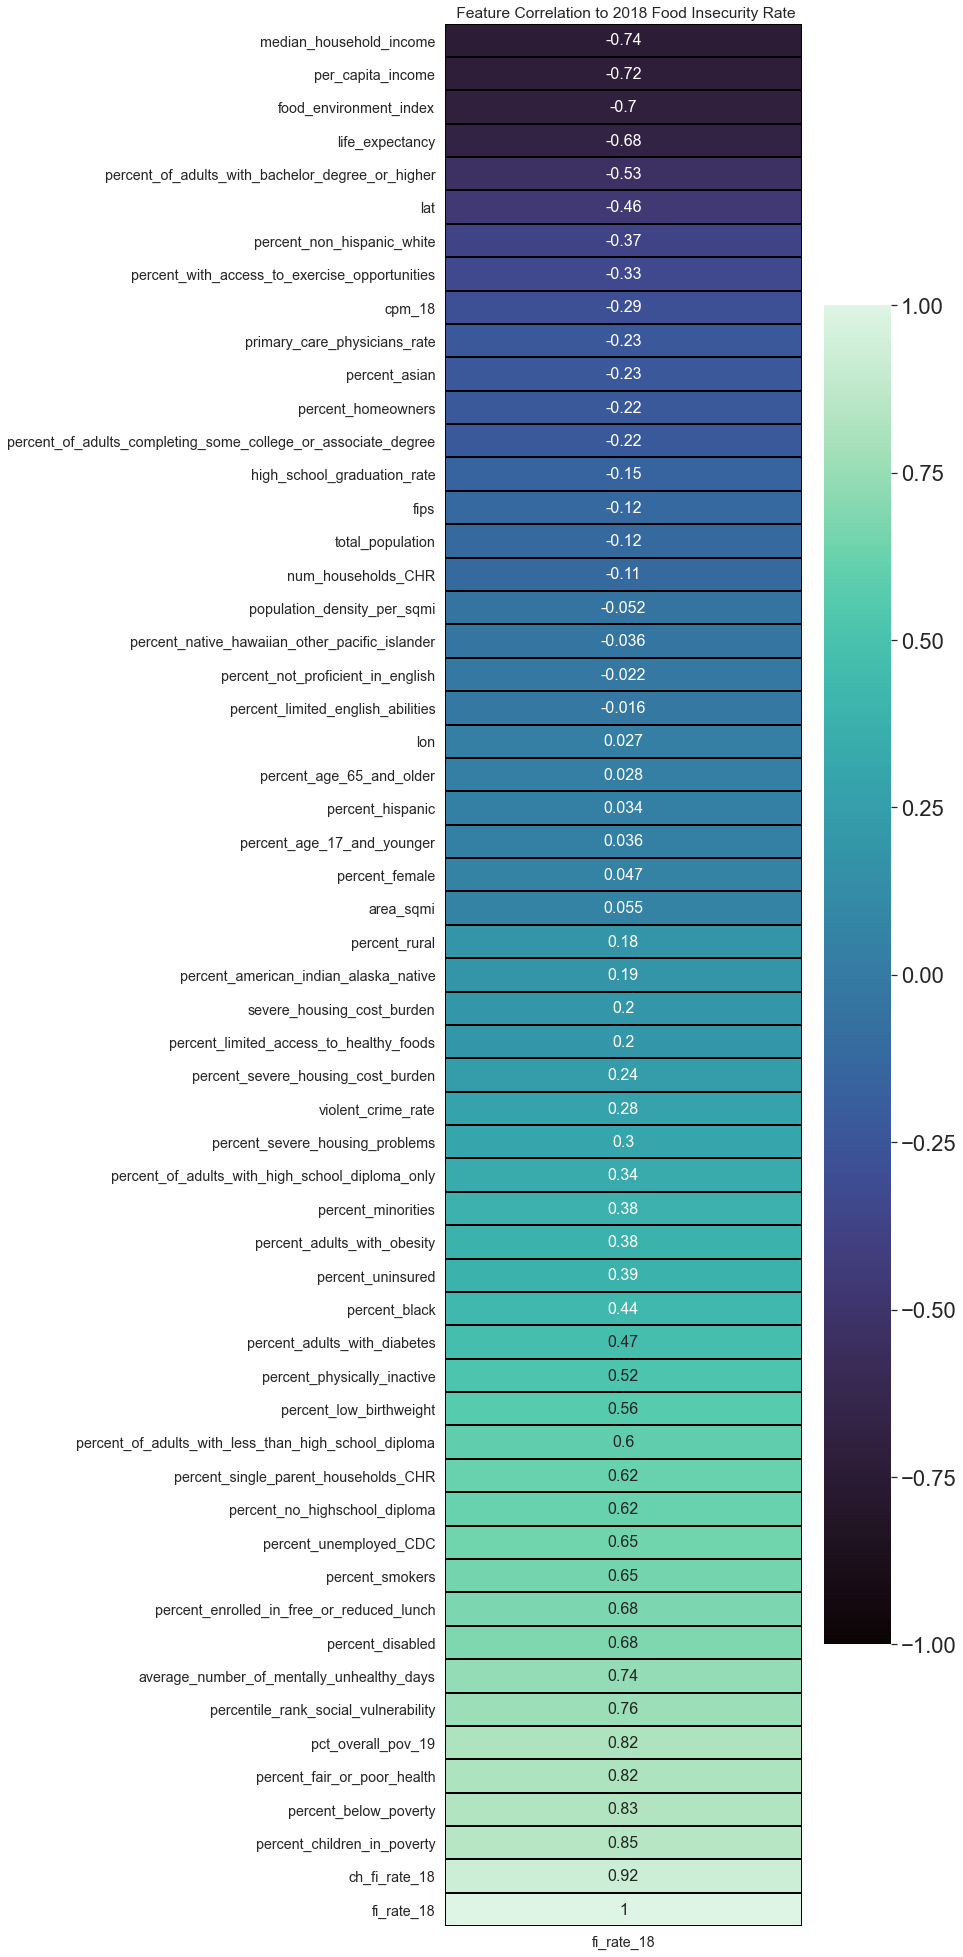

In [38]:
plt.figure(figsize=(8,35))
ax = plt.axes()
ax.set_title(' Feature Correlation to 2018 Food Insecurity Rate')
corr = df.corr()[['fi_rate_18']]
sns.set(font_scale=2)
sns.heatmap(corr.sort_values(by = 'fi_rate_18', ascending = True), 
            annot=True, cmap='mako', vmin = -1, vmax = 1, linecolor= 'black', 
            linewidth = 1,annot_kws={"fontsize":16});

In [4]:
# Indexed to exclude our target variable(s)
corr.sort_values(by = 'fi_rate_18', ascending = False)[2:12]

,fi_rate_18
percent_children_in_poverty,0.851354
percent_below_poverty,0.832892
percent_fair_or_poor_health,0.819851
pct_overall_pov_19,0.819300
percentile_rank_social_vulnerability,0.760997
average_number_of_mentally_unhealthy_days,0.735432
percent_disabled,0.684319
percent_enrolled_in_free_or_reduced_lunch,0.675576
percent_smokers,0.648979
percent_unemployed_CDC,0.645176


**Abridged Correlation Map - Socio-Economic Components (related to poverty):**

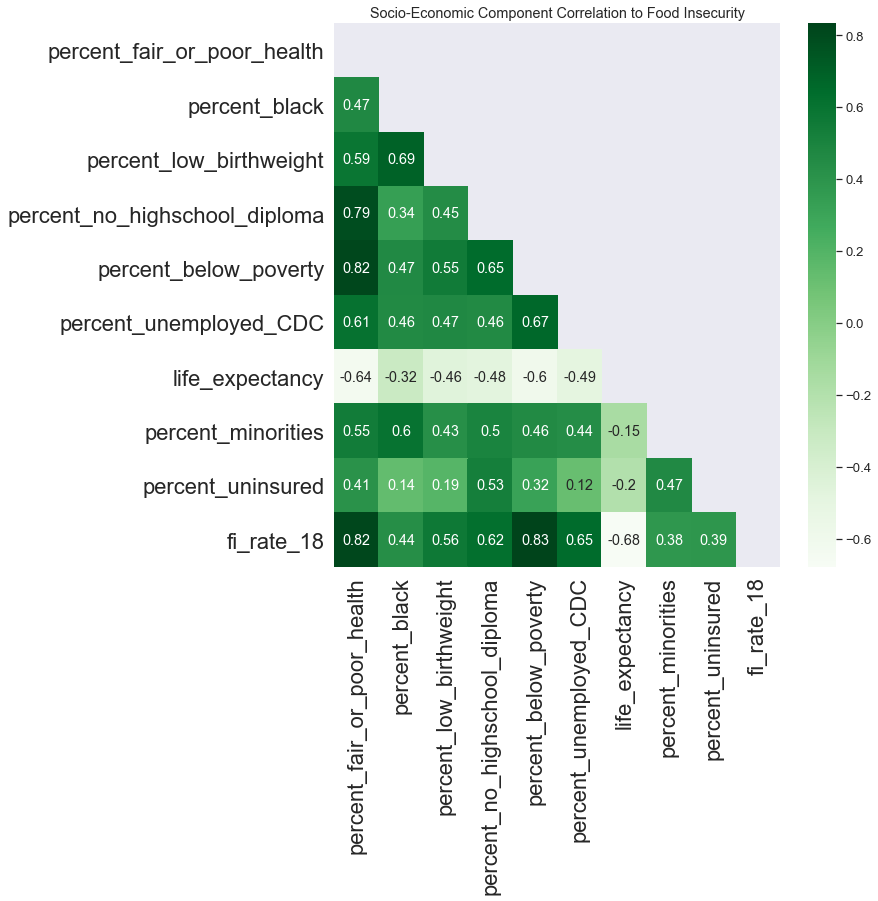

In [5]:
abridged = ['percent_fair_or_poor_health', 'percent_black', 
                  'percent_low_birthweight','percent_no_highschool_diploma',
                  'percent_below_poverty', 'percent_unemployed_CDC', 
                  'life_expectancy', 'percent_minorities',
                'percent_uninsured', 'fi_rate_18']
df_abr = df[abridged].copy()
corr = df_abr.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize= (10,10))
ax = plt.axes()
sns.set(font_scale=1.2)
sns.heatmap(corr, annot=True, cmap = "Greens",mask=mask,ax=ax)
ax.set_title('Socio-Economic Component Correlation to Food Insecurity')
plt.show()



**Socio-Economic Component Correlation to Food Insecurity**

The fact that percent_below_poverty is well correlated with fi_rates_18 (.83) and fair_or_poor_health (.82) is not surprising given the relative difficulty of finding low-cost, nutritious food compared with it's low-cost less less-nutritious alternative (eg. heavily processed foods). Equally unsurprising, poverty is well correlated with percent_no_highschool_diploma (.65) and percent_unemployed_CDC (.67) and is  negatively correlated with life expectancy (-.6).
Percent_low_birthweight correlations are interesting to consider as they display some possible intergenerational dimensions of food insecurity. The correlation with percent_fair_or_poor_health (.59), percent_below_poverty (.55) and fi_rate_18 (.56) is, again, unsurprising given the affect of nutrients and health on birthweight. However, the high correlation with percent_black (.69) is slightly more surprising, especially as percent_black does not have correlations over .5 with any other feature in this selection. 

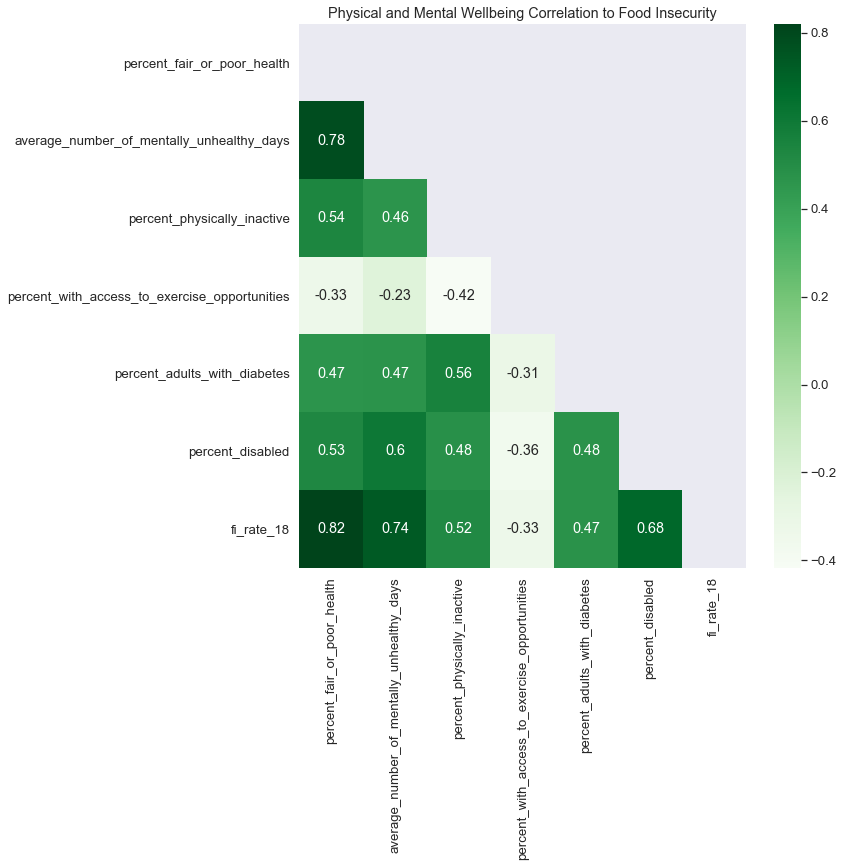

In [6]:
wellbeing= ['percent_fair_or_poor_health','average_number_of_mentally_unhealthy_days',
                         'percent_physically_inactive','percent_with_access_to_exercise_opportunities',
                         'percent_adults_with_diabetes','percent_disabled', 'fi_rate_18']
df_abr = df[wellbeing].copy()
corr = df_abr.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize= (10,10))
ax = plt.axes()
sns.set(font_scale=1.2)
sns.heatmap(corr, annot=True, cmap = "Greens",mask=mask,ax=ax)
ax.set_title('Physical and Mental Wellbeing Correlation to Food Insecurity')
plt.show()


**Physical and Mental Wellbeing Component Correlation to Food Insecurity**

Some things that aren't surprising; percent_fair_or_poor_health shows a very high (0.82) correlation to food insecurity. This is followed closely by average_number_of_mentally_unhealthy_days (0.74) and percent_disabled (0.68). When people have physical or mental restrictions, food insecurity will likely follow.  And, unfortunately, it's a iterative loop with an increase in food insecurity likely resulting in additional physical and mental degradations. What was surprising from this correlation map was the negative correlation found between percent_access_to_execise_opportunities and food insecurity. Perhaps having access to exercise (creating potentially healthier lifestyles) reduces food insecurity rates.  Or, on the other hand, having this access may be considered more of a 'privilege'.  Not all communities can provide parks, gyms, other greenspace to its citizens.  And those counties that can appear to have better access to resources (food, physical/mental care, others), resulting in less food insecurities. 

### Histograms of Numerical Features

**Distribution Review**

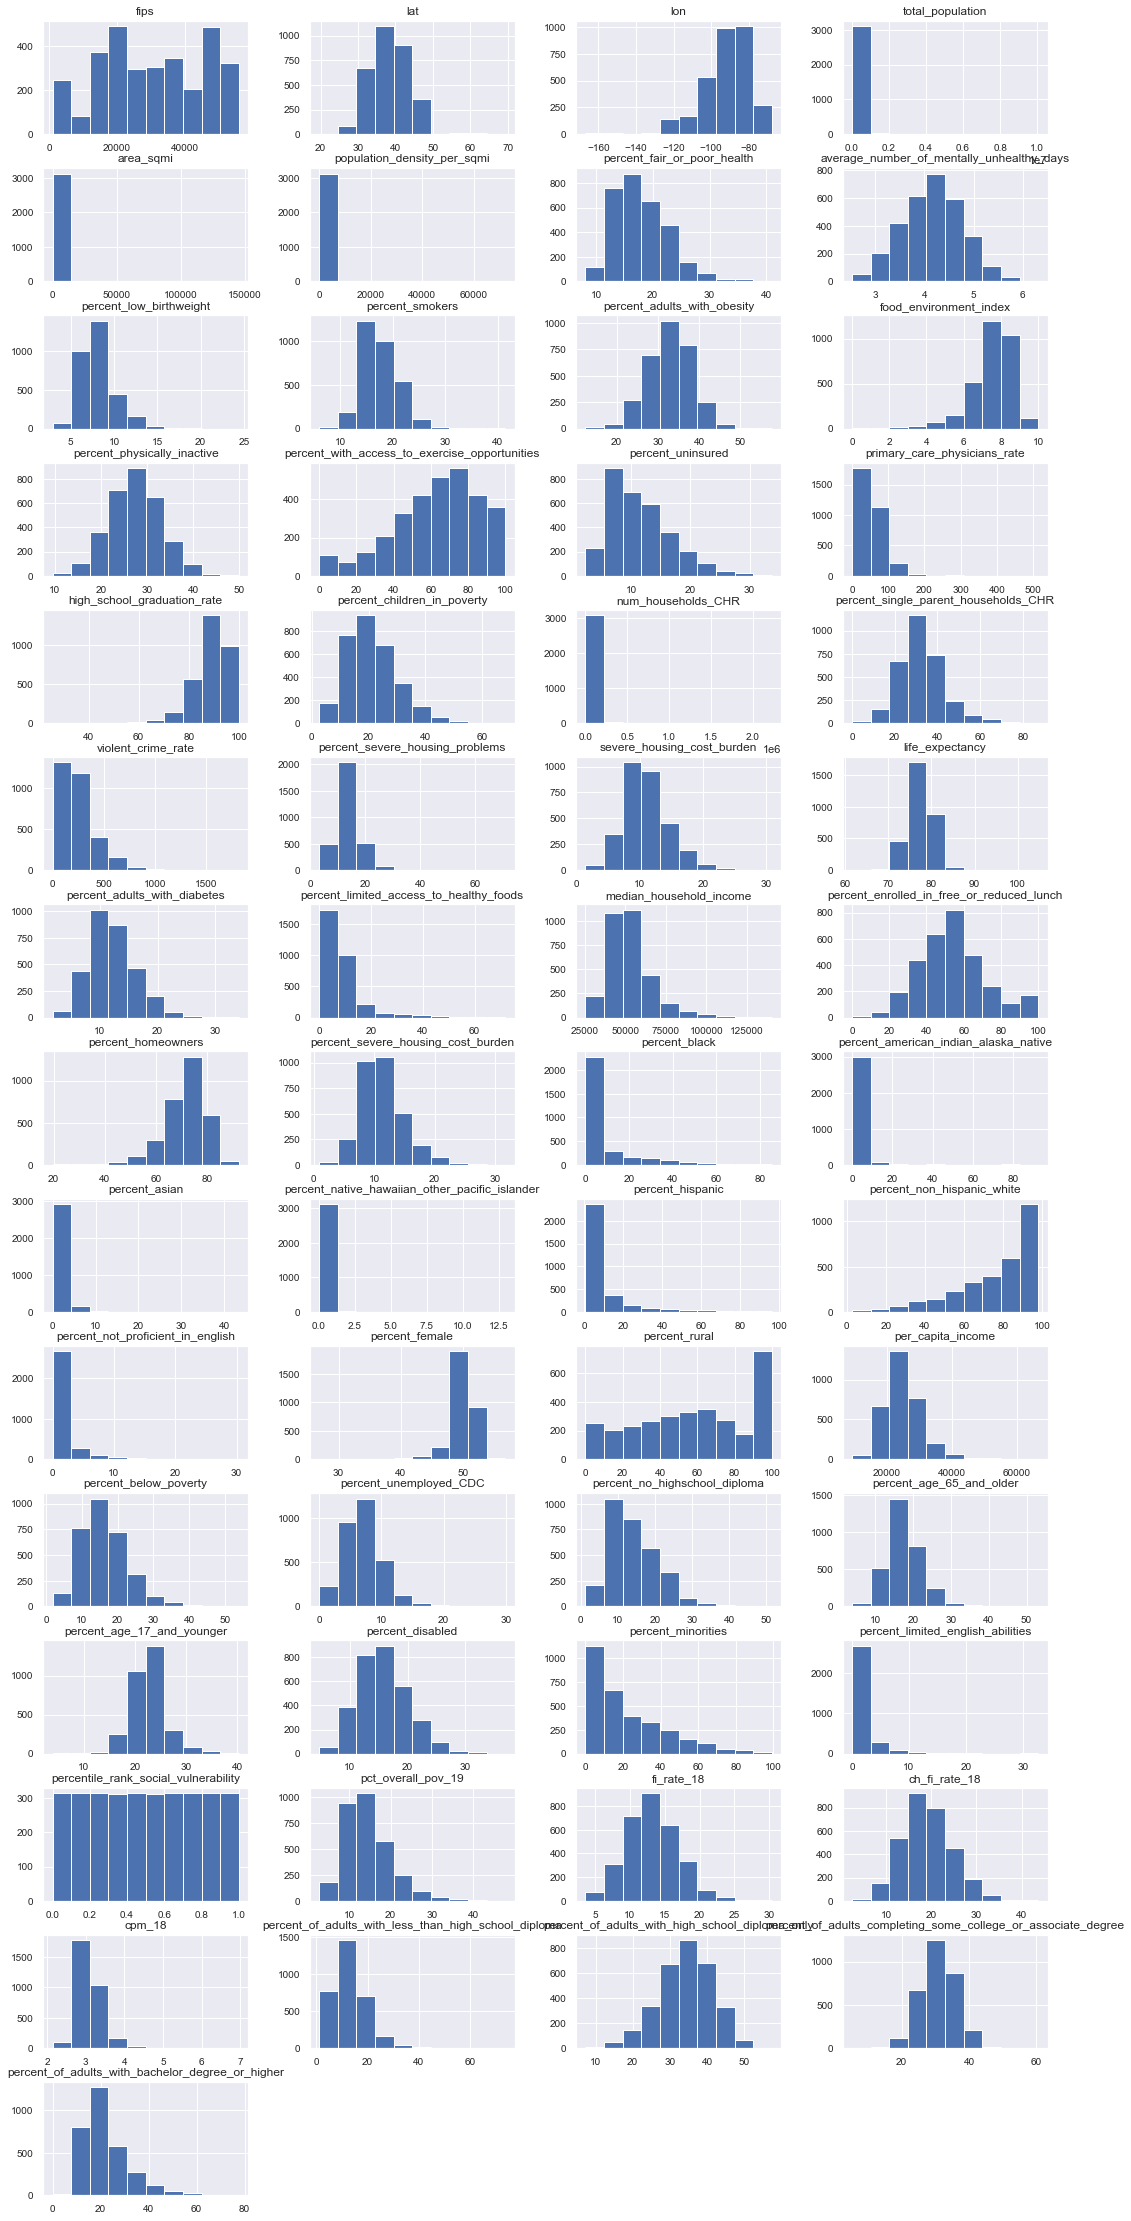

In [7]:
# Distribution by Count (# of Counties)
sns.set(font_scale=1.0)
df.hist(figsize=(18, 40), layout=(15, 4), xlabelsize=10, ylabelsize=10 );

### Box Plots For 'Percentage-Based' Statistics
**For high level review of data**

In [8]:
df.filter(like='percent', axis=1).shape

(3140, 37)

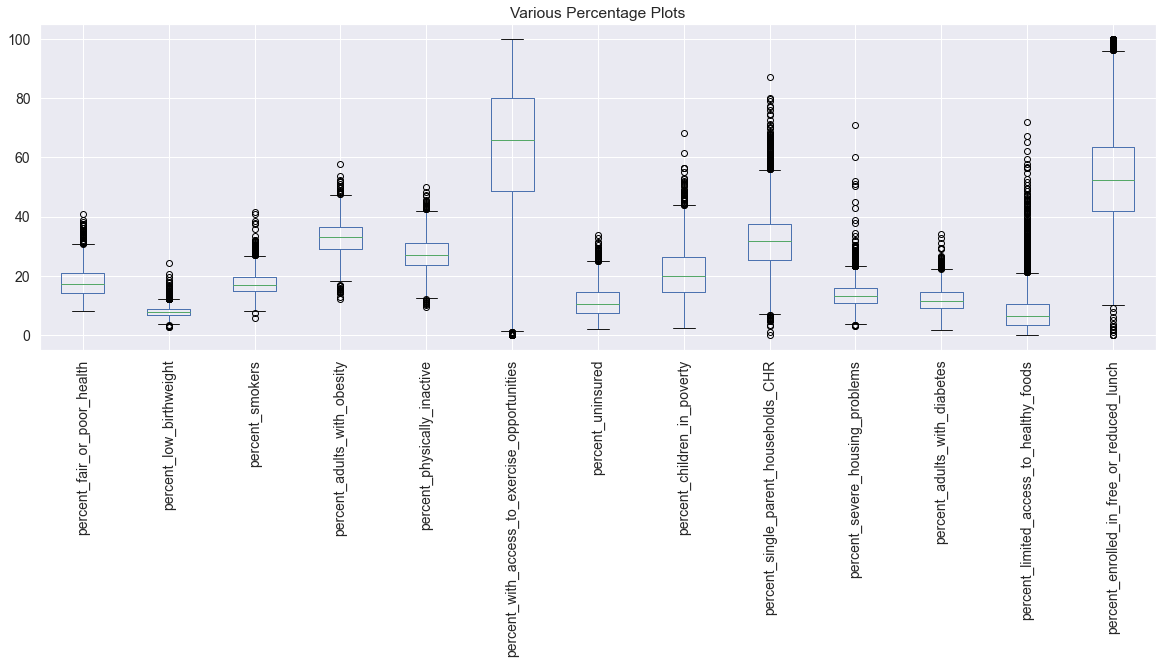

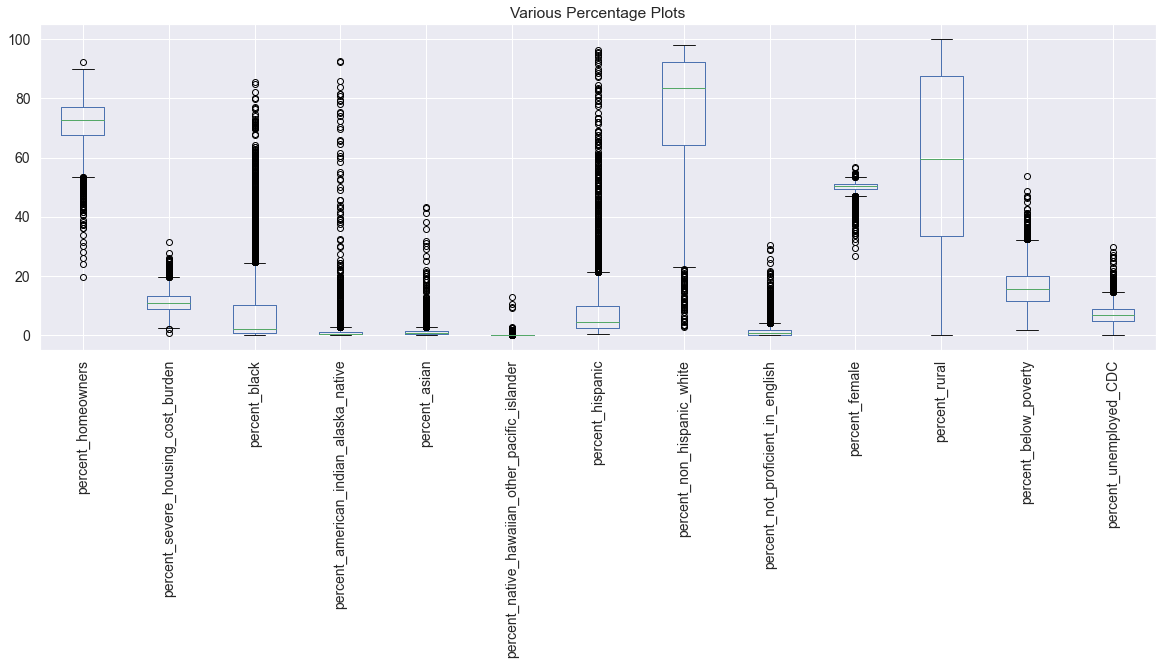

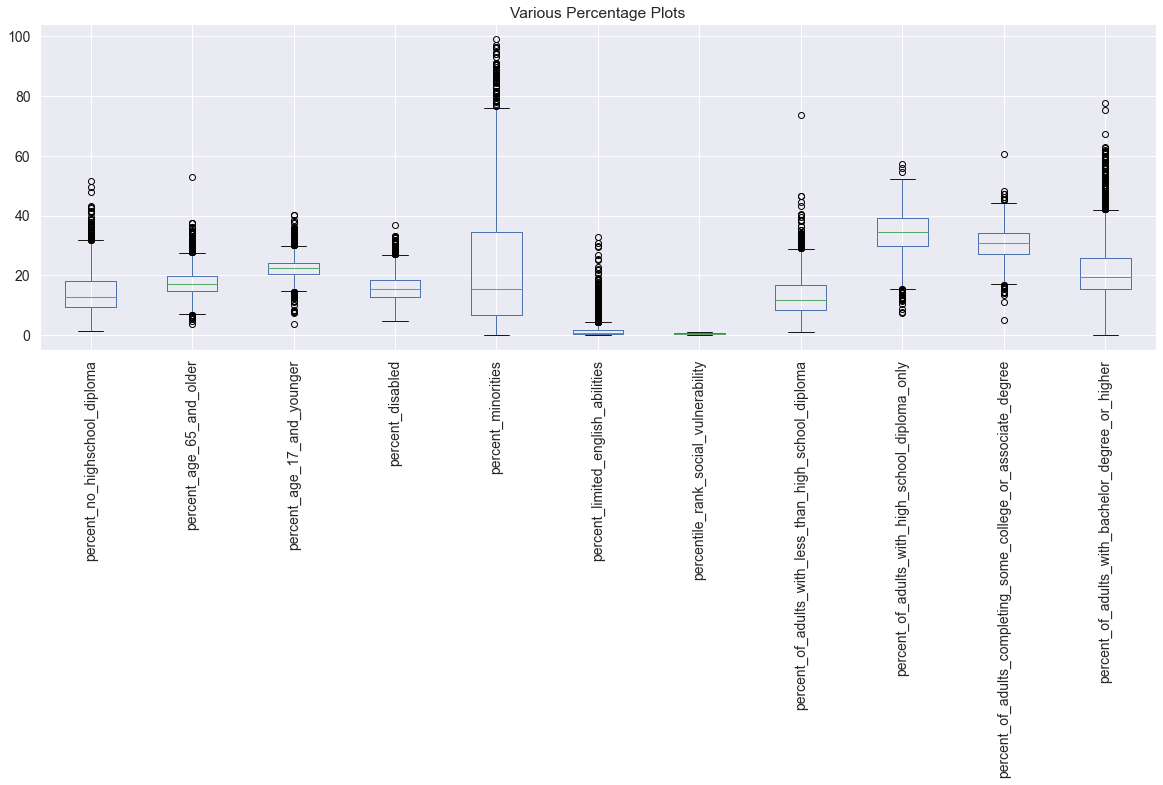

In [9]:
sns.set(font_scale=1.3)
df[df.filter(like='percent', axis=1).columns[0:13]
       ].plot(kind= 'box', figsize=(20,6), rot = 90,fontsize = 14, title= 'Various Percentage Plots');
df[df.filter(like='percent', axis=1).columns[13:26]
       ].plot(kind= 'box', figsize=(20,6), rot = 90,fontsize = 14, title= 'Various Percentage Plots');
df[df.filter(like='percent', axis=1).columns[26:37]
       ].plot(kind= 'box', figsize=(20,6), rot = 90,fontsize = 14, title= 'Various Percentage Plots');

### Box Plots For 'Rate-Based' Statistics

In [10]:
df.filter(like='rate', axis=1).shape

(3140, 5)

In [11]:
df.filter(like='rate', axis=1).head()

,primary_care_physicians_rate,high_school_graduation_rate,violent_crime_rate,fi_rate_18,ch_fi_rate_18
0,45.04180,90.000000,272.282220,15.6,21.4
1,72.89727,86.361577,203.660396,12.9,16.9
2,31.65809,81.410256,414.277861,21.9,32.0
3,48.52656,83.763838,89.349126,15.1,20.9
4,22.40877,93.468795,482.690611,13.6,19.1


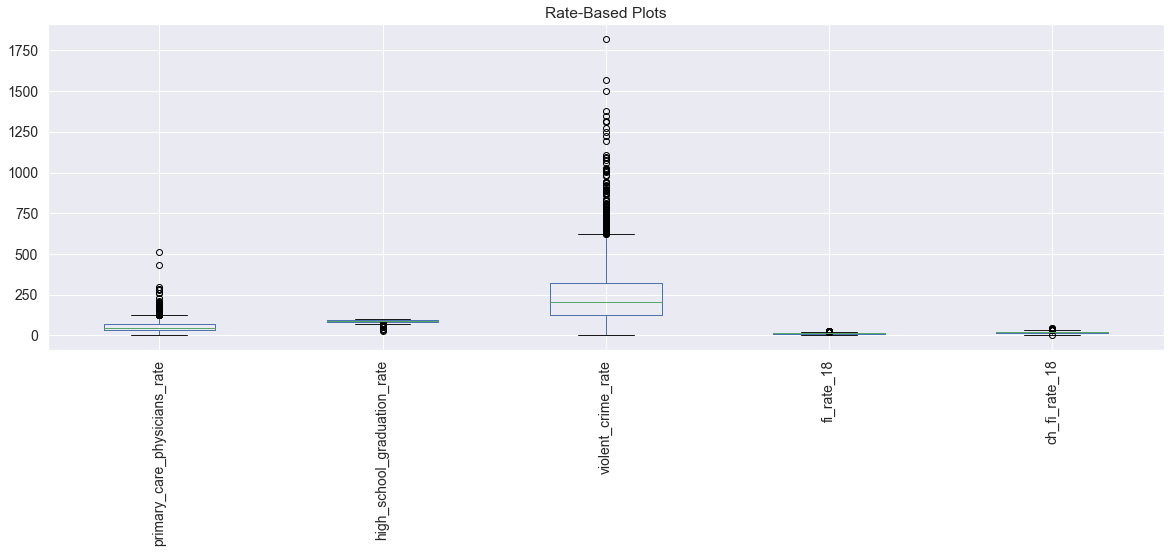

In [12]:
sns.set(font_scale=1.3)
df[df.filter(like='rate', axis=1).columns[0:6]
       ].plot(kind= 'box', figsize=(20,6), rot = 90,fontsize = 14, title= 'Rate-Based Plots');

In [33]:
df_crime = df[['violent_crime_rate','state_name','county']]

In [34]:
df_crime[df_crime['violent_crime_rate'] > 750].shape

(63, 3)

In [37]:
df_crime[df_crime['violent_crime_rate'] > 750].sort_values( by='violent_crime_rate', ascending = False).head(10)

,violent_crime_rate,state_name,county
1595,1819.514406,Missouri,St. Louis City
1214,1566.312209,Maryland,Baltimore City
405,1499.432647,Georgia,Calhoun
1148,1378.436162,Louisiana,Ouachita
2504,1346.154765,Tennessee,Shelby
595,1316.354271,Illinois,Alexander
528,1306.977047,Georgia,Turner
128,1274.262551,Arkansas,Crittenden
744,1251.169030,Indiana,Marion
319,1226.434877,District of Columbia,District of Columbia


**Rate-Based Stats:**

What really stands out in this plot are the outliers for violent_crime_rate.  Unfortunately, there are 63 counties in the country that suffer from much higher violent crime rates. These counties are spread all over the country. Top ten listed above.

### Food Insecurity By State

In [13]:
df_fi_state = df.groupby('state_name')[['fi_rate_18']].mean().copy()

In [14]:
df_fi_state = df_fi_state.reset_index().sort_values(by = 'fi_rate_18', ascending = False)

In [15]:
df_fi_state.shape

(51, 2)

In [16]:
x_val = df_fi_state['state_name']
y_val = df_fi_state['fi_rate_18']

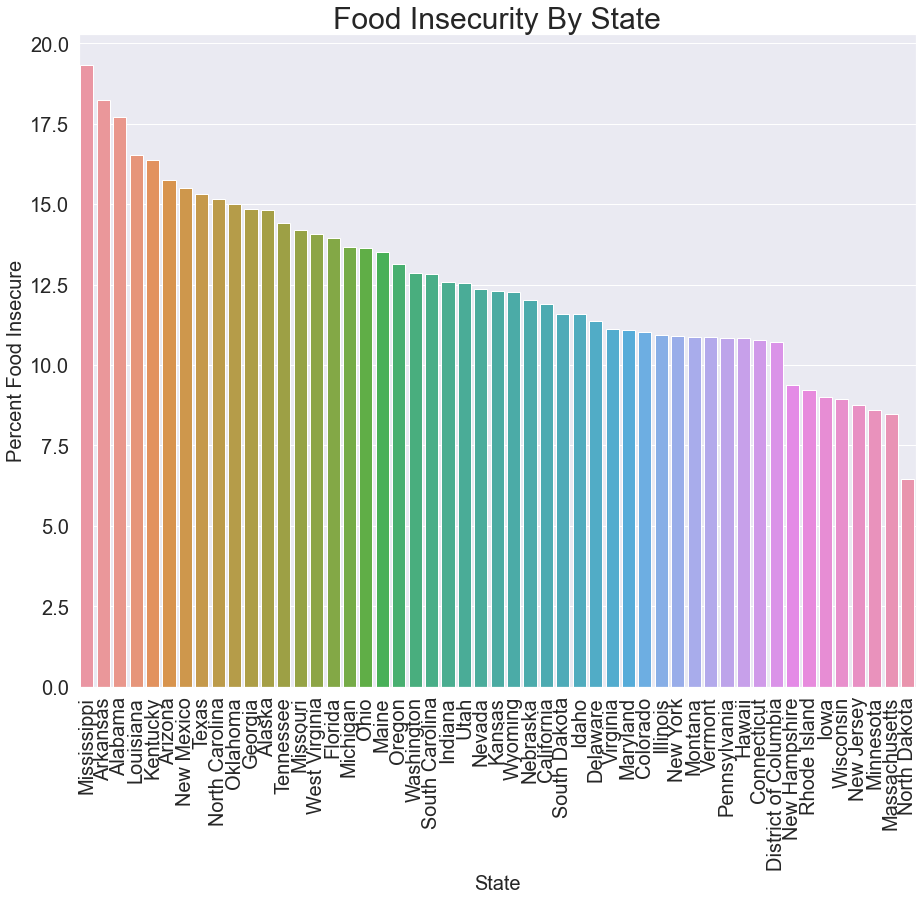

In [17]:
plt.figure(figsize=(15,12))
sns.barplot(x = x_val, y = y_val)
sns.set(font_scale=1.0)
plt.tick_params(labelsize = 20)
plt.xticks(rotation = 'vertical', fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Food Insecurity By State',fontdict={'fontsize':30})
plt.xlabel('State', fontsize=20)
plt.ylabel('Percent Food Insecure', fontsize=20)
plt.show()

**Food Insecurities per State:**

As we can see, the rates of food insecurity vary significantly by state, with a 10+ percent point difference between the highest (Mississippi - 19.32%) and lowest (North Dakota - 6.47%). States with the highest rates are predominantly clustered in the South and Southwest of the country.